<h2 style='color:SeaGreen; font-family:cursive;'>Задача 1: Минимизация гладкой функции</h2>

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import re
import numpy as np
import matplotlib.pyplot as plt

from scipy import linalg
from scipy.spatial.distance import cdist
from scipy import optimize

1. Рассмотрим все ту же функцию из задания по линейной алгебре: $f(x) = \sin(x / 5) \cdot \exp(x / 10) + 5 \exp(-x / 2)$, но теперь уже на промежутке [1, 30]

2. В первом задании будем искать минимум этой функции на заданном промежутке с помощью scipy.optimize. Разумеется, в дальнейшем вы будете использовать методы оптимизации для более сложных функций, а f(x) мы рассмотрим как удобный учебный пример.

3. Напишите на Питоне функцию, вычисляющую значение f(x) по известному x. Будьте внимательны: не забывайте про то, что по умолчанию в питоне целые числа делятся нацело, и о том, что функции sin и exp нужно импортировать из модуля math.

In [2]:
x = np.arange(1, 30.1, 0.1)

# Функция
def f(x):
    return np.sin(x/5) * np.exp(x/10) + 5 * np.exp(-x / 2)

**Визуализируем график функции**

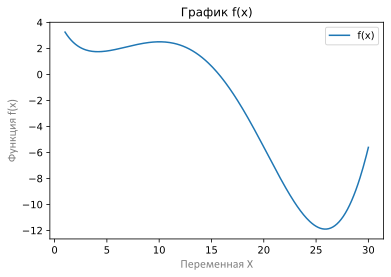

In [3]:
plt.plot(x, f(x))

title_dict = {'fontsize': 14, 'fontweight': 'bold', 'color': '#808080', 'family': 'Calibri'}
lable_dict = {'fontsize': 12, 'color': '#808080', 'family': 'Calibri'}

plt.title('График f(x)')
plt.xlabel('Переменная Х', fontdict=lable_dict)
plt.ylabel('Функция f(x)', fontdict=lable_dict)

plt.legend(labels=['f(x)'])

plt.show()

4. Изучите примеры использования  scipy.optimize.minimize в документации Scipy (см. "Материалы")

5. Попробуйте найти минимум, используя стандартные параметры в функции  scipy.optimize.minimize (т.е. задав только функцию и начальное приближение). Попробуйте менять начальное приближение и изучить, меняется ли результат. 

In [4]:
for i in [1, 5, 15, 30]:
    x_min = optimize.minimize(f, i)
    print(f'Приближение равно = {i} Минимум = {x_min.x}')

Приближение равно = 1 Минимум = [4.13628697]
Приближение равно = 5 Минимум = [4.13628832]
Приближение равно = 15 Минимум = [24.67766111]
Приближение равно = 30 Минимум = [25.88019321]


6. Укажите в scipy.optimize.minimize в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения x=2. Градиент функции при этом указывать не нужно – он будет оценен численно. Полученное значение функции в точке минимума - ваш первый ответ по заданию 1, его надо записать с точностью до 2 знака после запятой.

In [5]:
x = 2
x_min = optimize.minimize(f, x, method='BFGS')
print(f'Приближение равно = {x} Минимум = {x_min.x[0]:.2f}')

Приближение равно = 2 Минимум = 4.14


7. Теперь измените начальное приближение на x=30. Значение функции в точке минимума - ваш второй ответ по заданию 1, его надо записать через пробел после первого, с точностью до 2 знака после запятой.

In [6]:
x = 30
x_min = optimize.minimize(f, x, method='BFGS')
print(f'Приближение равно = {x} Минимум = {x_min.x[0]:.2f}')

Приближение равно = 30 Минимум = 25.88


8. Стоит обдумать полученный результат. Почему ответ отличается в зависимости от начального приближения? Если нарисовать график функции (например, как это делалось в видео, где мы знакомились с Numpy, Scipy и Matplotlib), можно увидеть, в какие именно минимумы мы попали. В самом деле, градиентные методы обычно не решают задачу глобальной оптимизации, поэтому результаты работы ожидаемые и вполне корректные.

In [7]:
x = np.arange(1, 30.1, 0.1)

x_mins = []
f_x_mins = []

for i in [1, 15, 30]:  # Выбираем точки для приближения
    x_min = optimize.minimize(f, i, method='BFGS')  # Выполняем оптимизацию
    x_mins.append(x_min.x[0])  # Список минимумов
    f_x_mins.append(f(x_min.x[0]))  # Функция от минимума

**Визуализируем результат**

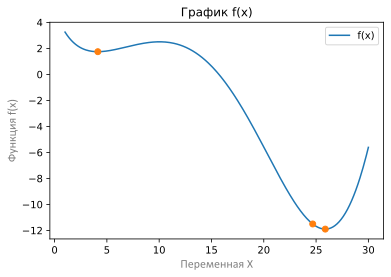

In [8]:
plt.plot(x, f(x), '-', x_mins, f_x_mins, 'o')

title_dict = {'fontsize': 14, 'fontweight': 'bold', 'color': '#808080', 'family': 'Calibri'}
lable_dict = {'fontsize': 12, 'color': '#808080', 'family': 'Calibri'}

plt.title('График f(x)')
plt.xlabel('Переменная Х', fontdict=lable_dict)
plt.ylabel('Функция f(x)', fontdict=lable_dict)

plt.legend(labels=['f(x)'])

plt.show()

<h2 style='color:SeaGreen; font-family:cursive;'>Задача 2: Глобальная оптимизация</h2>

1. Теперь попробуем применить к той же функции f(x) метод глобальной оптимизации — дифференциальную эволюцию.

2. Изучите документацию и примеры использования функции scipy.optimize.differential_evolution.

3. Обратите внимание, что границы значений аргументов функции представляют собой список кортежей (list, в который помещены объекты типа tuple). Даже если у вас функция одного аргумента, возьмите границы его значений в квадратные скобки, чтобы передавать в этом параметре список из одного кортежа, т.к. в реализации scipy.optimize.differential_evolution длина этого списка используется чтобы определить количество аргументов функции.

4. Запустите поиск минимума функции f(x) с помощью дифференциальной эволюции на промежутке [1, 30]. Полученное значение функции в точке минимума - ответ в задаче 2. Запишите его с точностью до второго знака после запятой. В этой задаче ответ - только одно число.

In [9]:
optimize.differential_evolution(f, [(1, 30)])

     fun: array([-11.89889467])
     jac: array([0.])
 message: 'Optimization terminated successfully.'
    nfev: 113
     nit: 6
 success: True
       x: array([25.88019295])

5. Заметьте, дифференциальная эволюция справилась с задачей поиска глобального минимума на отрезке, т.к. по своему устройству она предполагает борьбу с попаданием в локальные минимумы.

6. Сравните количество итераций, потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся дифференциальной эволюции. При повторных запусках дифференциальной эволюции количество итераций будет меняться, но в этом примере, скорее всего, оно всегда будет сравнимым с количеством итераций BFGS. Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS. Например, можно обратить внимание на количество вычислений значения функции (nfev) и увидеть, что у BFGS оно значительно меньше. Кроме того, время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции.

In [10]:
optimize.minimize(f, 30, method='BFGS')

      fun: -11.898894665981313
 hess_inv: array([[1.67936744]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.88019321])

<h2 style='color:SeaGreen; font-family:cursive;'>Задача 3: Минимизация негладкой функции
</h2>

1. Теперь рассмотрим функцию $h(x) = int(f(x))$ на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.

In [11]:
def h(x):
    return int(f(x)) if len(x) == 1 else [int(f(i)) for i in x]

2. Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график h(x) с помощью matplotlib.

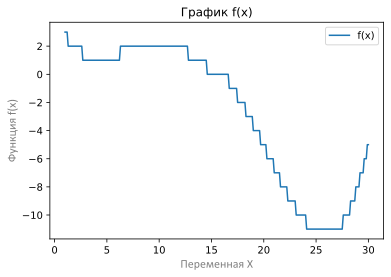

In [12]:
x = np.arange(1, 30.1, 0.1)

plt.plot(x, h(x))

title_dict = {'fontsize': 14, 'fontweight': 'bold', 'color': '#808080', 'family': 'Calibri'}
lable_dict = {'fontsize': 12, 'color': '#808080', 'family': 'Calibri'}

plt.title('График f(x)')
plt.xlabel('Переменная Х', fontdict=lable_dict)
plt.ylabel('Функция f(x)', fontdict=lable_dict)

plt.legend(labels=['f(x)'])

plt.show()

3. Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Получившееся значение функции – ваш первый ответ в этой задаче.

In [13]:
optimize.minimize(h, 30, method='BFGS')

      fun: -5
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 2
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])

4. Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании. Запишите его через пробел после предыдущего.

In [14]:
optimize.differential_evolution(h, [(1, 30)])

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 92
     nit: 5
 success: True
       x: array([27.14273809])

5. Обратите внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).

6. Выполнив это задание, вы увидели на практике, чем поиск минимума функции отличается от глобальной оптимизации, и когда может быть полезно применить вместо градиентного метода оптимизации метод, не использующий градиент. Кроме того, вы попрактиковались в использовании библиотеки SciPy для решения оптимизационных задач, и теперь знаете, насколько это просто и удобно.